In [4]:
import stats
import scipy
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
df = pd.read_csv("Clinical.csv")
df.head(2)

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
0,0,0.0,0,0,4,2,2,0,73
1,0,1.2,1,0,4,2,2,1,73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Relapse     392 non-null    int64  
 1   CEA_Post    392 non-null    float64
 2   Lymphatic   392 non-null    int64  
 3   Vascular    392 non-null    int64  
 4   pStage      392 non-null    int64  
 5   pT          392 non-null    int64  
 6   pN          392 non-null    object 
 7   Perineural  392 non-null    int64  
 8   Age         392 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 27.7+ KB


# 실습 과제

1. 연속형 변수에 대하여
Density plot 검색해서 그려보기 (CEA_Post, Age)

2. 범주형 변수에 대하여 (Vascular, pStage)
Count를 기반으로 bar-plot 그려보기

Vascular의 Count에 대하여 Fisher exact test를 이용하여 통계 p-value를 구하고,
그림에 통계 수치 추가해보기

In [14]:
df.loc[df['Age'] == "65a", ]

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
133,1,1.5,1,1,5,3,3,0,65a


In [19]:
df['Age'][df.Age == "65a"] = 65

C:\Users\user\AppData\Local\Temp/ipykernel_17948/632199073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df.Age == "65a"] = 65


In [22]:
df['Age'][df.Age == "61s"] = 61

C:\Users\user\AppData\Local\Temp/ipykernel_17948/193845007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df.Age == "61s"] = 61


In [23]:
df['Age'].unique()

array(['73', '53', '57', '65', '77', '50', '70', '78', '66', '71', '63',
       '64', '62', '48', '60', '75', '72', '68', '59', '76', '46', '49',
       '54', '58', '67', '51', '43', '56', '40', '33', '55', '69', '61',
       '44', 65, '24', '74', '52', '79', '38', '80', '45', '83', 61, '41',
       '47', '26', '42', '37', '35'], dtype=object)

In [26]:
df['Age'] = df['Age'].astype("int64")

In [27]:
df['Age']

0      73
1      73
2      53
3      57
4      65
       ..
387    57
388    63
389    63
390    57
391    52
Name: Age, Length: 392, dtype: int64

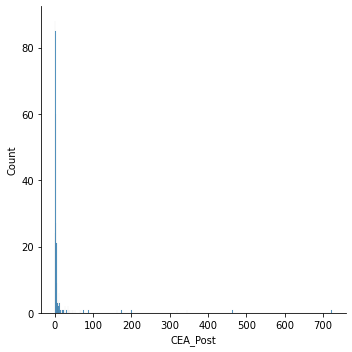

In [31]:
sns.displot(df, x="CEA_Post")

In [32]:
df.describe()

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,Perineural,Age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.420918,11.491327,0.681122,0.454082,4.216837,2.640306,0.114796,63.028061
std,0.494337,52.816959,0.466637,0.498523,1.126941,1.222428,0.319183,9.733362
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,24.000000
25%,0.000000,1.400000,0.000000,0.000000,4.000000,2.000000,0.000000,57.000000
50%,0.000000,2.300000,1.000000,0.000000,4.000000,2.000000,0.000000,65.000000
75%,1.000000,4.300000,1.000000,1.000000,5.000000,4.000000,0.000000,70.000000
max,1.000000,723.000000,1.000000,1.000000,6.000000,5.000000,1.000000,83.000000


In [49]:
df["CEA_Post_log"] = np.log(df["CEA_Post"] + 1)

<AxesSubplot:ylabel='Density'>

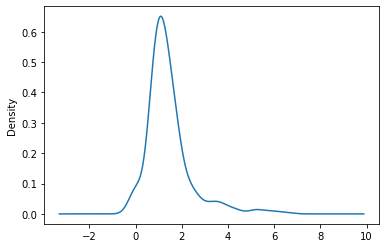

In [42]:
np.log(df["CEA_Post"] + 1).plot.density()

<AxesSubplot:ylabel='Density'>

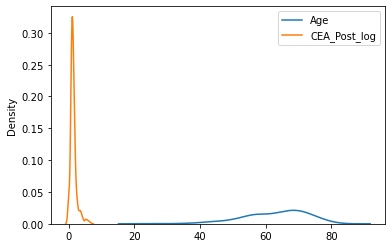

In [51]:
sns.kdeplot(data=df[["Age", "CEA_Post_log"]])

<AxesSubplot:ylabel='Density'>

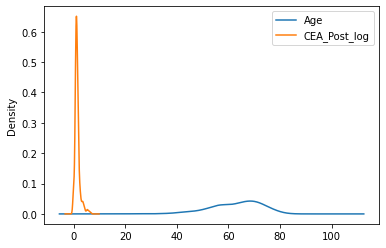

In [53]:
df[["Age", "CEA_Post_log"]].plot.density()